In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Image

# In this notebook

# References

- [Introduction to statistical learning] (http://fs2.american.edu/alberto/www/analytics/ISLRLectures.html)
- [Elements of statistical learning] (https://web.stanford.edu/~hastie/ElemStatLearn/)
- [Machine learning] (https://www.coursera.org/learn/machine-learning)

# (A) Define cost and gradient for gradient descent 

In [847]:
def CostGrad(y_hat, y , X , m):
    cost = - ((1/m)*(y.T@np.log(y_hat) + (1 - y).T@np.log(1-y_hat) ))[0][0]
    grad =   (1/m)* ((y_hat - y).T @ X).T
    return cost, grad

# (B) Student admission dataset 

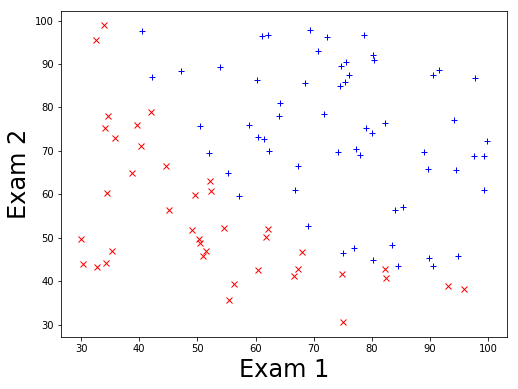

In [831]:
df_check = pd.read_csv('ex2data1.txt', sep = ',', header=None)

plt.figure(figsize=(8,6))
plt.plot()
plt.plot(df_check[df_check[2]==1][0] , df_check[df_check[2]==1][1], 'b+')
plt.plot(df_check[df_check[2]==0][0] , df_check[df_check[2]==0][1], 'rx')
plt.xlabel('Exam 1', fontsize=24)
plt.ylabel('Exam 2', fontsize=24)
plt.show()

# Initial tests of cost and gradient 

In [832]:
print("Zero W's : ")
W_check = np.zeros((3,1))
x_check = df_check.iloc[:,0:2]
y_check = df_check.iloc[:,2].values.reshape(-1,1)
X_check , m_check = np.hstack((np.ones((len(x_check),1)), x_check)), len(x_check)


y_hat_check = 1 / (1 + np.exp(-X_check@W_check))
cost, grad   = CostGrad(y_hat_check, y_check, X_check, m_check)

print(f'Cost: |  Expected: 0.693 |   Calculated : {np.round(cost,3)}' )
print(f'Grad: |  Expected: (-0.1, -12.0092, -11.2628) | Calculated : {grad[0][0] , round(grad[1][0],4) , round(grad[2][0],4)}' )


#  ===========================================================================================================================
print(' ')
print("Nonzero W's : ")
W_check = np.array([-24, 0.2, 0.2]).reshape(-1,1)
df_check = pd.read_csv('ex2data1.txt', sep = ',', header=None)
x_check = df_check.iloc[:,0:2]
y_check = df_check.iloc[:,2].values.reshape(-1,1)
X_check , m_check = np.hstack((np.ones((len(x_check),1)), x_check)), len(x_check)


y_hat_check = 1 / (1 + np.exp(-X_check@W_check))
cost, grad   = CostGrad(y_hat_check, y_check, X_check, m_check)

print(f'Cost: |  Expected: 0.218 |   Calculated : {np.round(cost,3)}' )
print(f'Grad: |  Expected: (0.043, 2.566, 2.647) | Calculated : {round(grad[0][0],3) , round(grad[1][0],3) , round(grad[2][0],3)}' )


Zero W's : 
Cost: |  Expected: 0.693 |   Calculated : 0.693
Grad: |  Expected: (-0.1, -12.0092, -11.2628) | Calculated : (-0.1, -12.0092, -11.2628)
 
Nonzero W's : 
Cost: |  Expected: 0.218 |   Calculated : 0.218
Grad: |  Expected: (0.043, 2.566, 2.647) | Calculated : (0.043, 2.566, 2.647)


# Gradient descent on admission data set 

In [844]:
df_check = pd.read_csv('ex2data1.txt', sep = ',', header=None)
x = df_check.iloc[:,0:2]
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)   # Standardize the data for the sigmoid function 
X , m, n = np.hstack((np.ones((len(x),1)), x)), X.shape[0] , X.shape[1]
y  = df_check.iloc[:,2].values.reshape(-1,1)
Xy = np.hstack((X,y)) 
# ============================================================

N_iter = 10000
alpha  = 3e-2
W = np.zeros((n,1))   # Initialize weights

cost_mon = np.zeros((N_iter,1))
for ii in range(N_iter):
    y_hat        = 1 / ( 1 + np.exp(-X@W) )
    cost, grad   = CostGrad(y_hat, y, X, m)
    W           -= alpha * grad
    cost_mon[ii] = cost
    #print(ii,cost)
     
print('Cost: ', round(cost,3))
print("Learned Parameters : ", 'W0:', W[0] , '| W1: ', W[1] ,  '| W2: ', W[2])

Cost:  0.204
Learned Parameters :  W0: [1.60736354] | W1:  [3.75624897] | W2:  [3.4962897]


# Cost evolution in gradient descent 

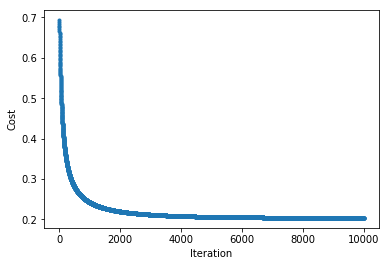

In [845]:
plt.plot(np.arange(0,N_iter),cost_mon,'.')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()

# Decision boundary and the data

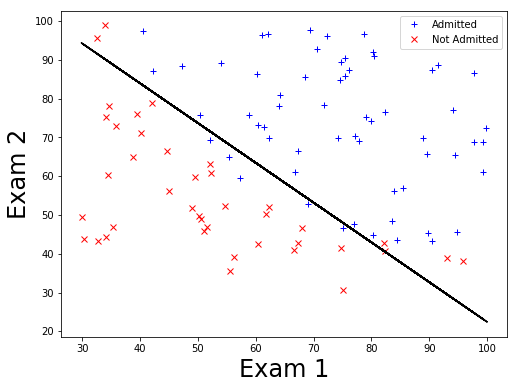

In [846]:
Exam1      =  x.iloc[:,0].values.reshape(-1,1)     # Extract the x-values
Vertical   = - (W[0]  +  W[1] * Exam1) / W[2]      # Find the y-values using the trained parameters
Horizontal =  (df_check.iloc[:,0].std() * x.iloc[:,0] + df_check.iloc[:,0].mean()).values.reshape(-1,1) # Back to real data units 
Vertical   = Vertical * df_check.iloc[:,1].std() + df_check.iloc[:,1].mean()                            # Back to real data units


# Plot the data and the decision boundary
plt.figure(figsize=(8,6))
plt.plot(df_check[df_check[2]==1][0] , df_check[df_check[2]==1][1], 'b+', label='Admitted')
plt.plot(df_check[df_check[2]==0][0] , df_check[df_check[2]==0][1], 'rx', label='Not Admitted')
plt.plot(Horizontal, Vertical, 'k')
plt.xlabel('Exam 1', fontsize=24)
plt.ylabel('Exam 2', fontsize=24)
plt.legend()
plt.show()

# (C) Credit default dataset

In [848]:
# Load the default data 
Default_DF = pd.read_csv('Default.csv', index_col=0)
Default_DF.tail(10)

,default,student,balance,income
9991,No,No,372.379238,25374.89909
9992,No,No,658.799558,54802.07822
9993,No,No,1111.647317,45490.68246
9994,No,No,938.836241,56633.44874
9995,No,Yes,172.412988,14955.94169
9996,No,No,711.555020,52992.37891
9997,No,No,757.962918,19660.72177
9998,No,No,845.411989,58636.15698
9999,No,No,1569.009053,36669.11236
10000,No,Yes,200.922183,16862.95232


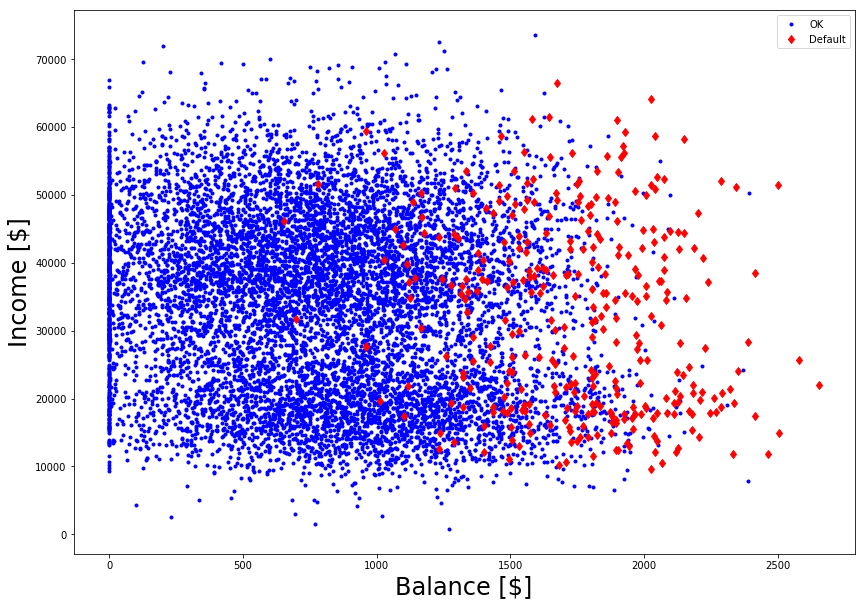

In [849]:
plt.figure(figsize=(14,10))
plt.plot(Default_DF[Default_DF.default=='No'].balance , Default_DF[Default_DF.default=='No'].income, 'b.', label='OK')
plt.plot(Default_DF[Default_DF.default=='Yes'].balance , Default_DF[Default_DF.default=='Yes'].income, 'rd', label='Default')
plt.xlabel('Balance [$]', fontsize=24)
plt.ylabel('Income [$]', fontsize=24)
plt.legend()
plt.show()

# Logistic regression with one variable : student 

In [850]:
student_cat_dumm = pd.get_dummies(Default_DF.student)
print(student_cat_dumm.head())

Default_Student                = student_cat_dumm
Default_Student['Default']      = Default_DF.default
Default_Student.drop('No', axis = 1, inplace = True)
Default_Student.head()

   No  Yes
1   1    0
2   0    1
3   1    0
4   1    0
5   1    0


,Yes,Default
1,0,No
2,1,No
3,0,No
4,0,No
5,0,No


# Gradient descent (predictor: student)

In [901]:
x = Default_Student.Yes.values.reshape(-1,1)
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)   # Standardize the data for the sigmoid function 

X, m, n = np.hstack((np.ones((len(x),1)), x)), X.shape[0] , X.shape[1]

y = (Default_Student.Default.eq('Yes')*1).values.reshape(-1,1)
# ============================================================

N_iter = 2500
alpha  = 1e-1
W = np.zeros((n,1))   # Initialize weights


cost_mon = np.zeros((N_iter,1))

for ii in range(N_iter):
    y_hat        = 1 / ( 1 + np.exp(-X@W) )
    cost, grad   = CostGrad(y_hat, y, X, m)
    W           -= alpha * grad
    cost_mon[ii] = cost
    #print(ii,cost)
     
W

array([[-3.38429267],
       [ 0.18414805]])

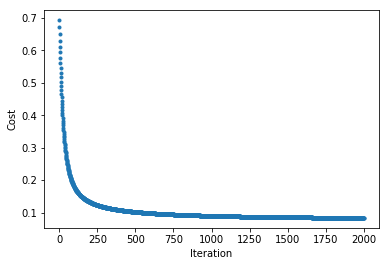

In [948]:
plt.plot(cost_mon,'.')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()

# Default predictions based on student status 

In [905]:
Boundary   = W[0] + W[1] * 1.54814054
Prediction_Student = 1 /(1 + np.exp(-Boundary))
  
Boundary   = W[0] + W[1] * (-0.64593619)
Prediction_NonStudent = 1 /(1 + np.exp(-Boundary))

    
print('Default probability for students:     ' , Prediction_Student) 
print('Default probability for non-students: ' , Prediction_NonStudent)

Default probability for students:      [0.04314003]
Default probability for non-students:  [0.02922017]


# Logistic regression with one variable : balance

In [407]:
data = {'balance': Default_DF.balance , 'default': Default_DF.default } 
Default_Balance = pd.DataFrame(data)
Default_Balance.tail()

,balance,default
9996,711.555020,No
9997,757.962918,No
9998,845.411989,No
9999,1569.009053,No
10000,200.922183,No


# Gradient Descent (predictor: balance)

In [962]:
x = Default_Balance.balance.values.reshape(-1,1)
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)   # Standardize the data for the sigmoid function 

X , m = np.hstack((np.ones((len(x),1)), x)) , len(x)
y = (Default_Balance.default.eq('Yes')*1).values.reshape(-1,1)

# ------------------------------------------------------------

N_iter = 2000
alpha  = 5e-1
W = np.zeros((2,1))   # Initialize weights
cost_mon = np.zeros((N_iter,1))

for ii in range(N_iter):
    y_hat        = 1 / ( 1 + np.exp(-X@W) )
    cost, grad   = CostGrad(y_hat, y, X, m)
    W           -= alpha * grad
    cost_mon[ii] = cost
W

array([[-5.90350421],
       [ 2.57332988]])

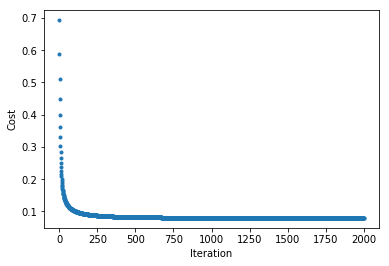

In [963]:
plt.plot(cost_mon,'.')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()

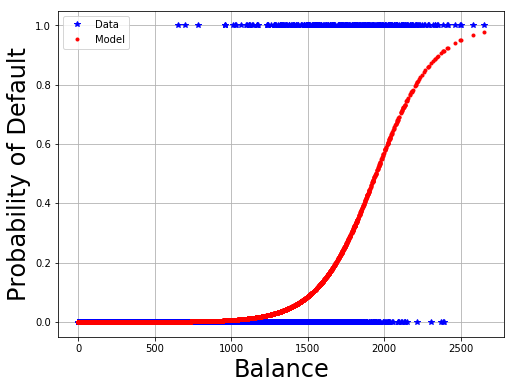

In [964]:
Predictor = (  x * np.std(Default_Balance.balance) ) + np.mean(Default_Balance.balance)
Boundary           = W[0] + W[1] *  x
Prediction_Balance = 1 /(1 + np.exp(-Boundary))
    
# Plot the data and the decision boundary
plt.figure(figsize=(8,6))
plt.plot(Default_Balance.balance, y, 'b*', label='Data')
plt.plot(Predictor, Prediction_Balance, 'r.', label='Model')
plt.xlabel('Balance', fontsize=24)
plt.ylabel('Probability of Default', fontsize=24)
plt.legend()
plt.grid()
plt.show()